In [22]:
import polars as pl 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cov = 0.52

df = pl.read_csv(f"output/{cov}/{cov}_elongates.csv", infer_schema_length =10000)



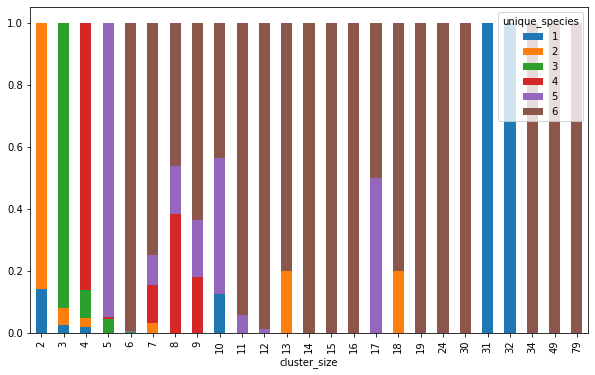

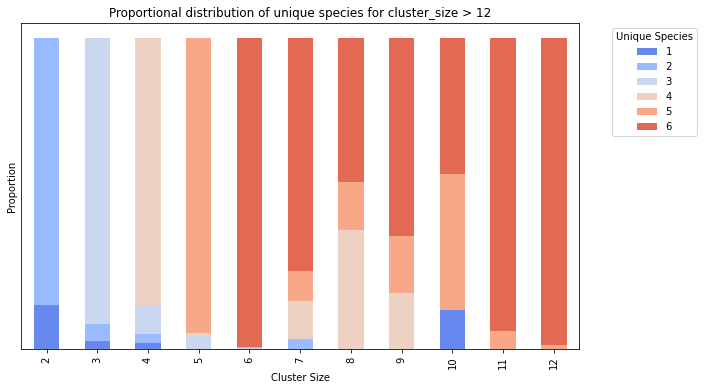

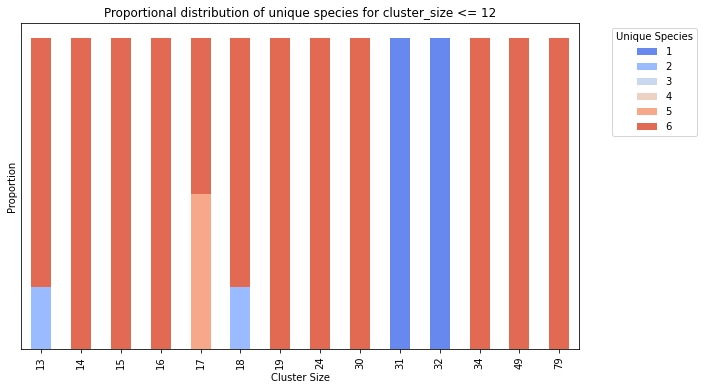

In [35]:
pdf = df.to_pandas()

unique_species_values = sorted(df['unique_species'].unique())

colors = sns.color_palette("coolwarm", n_colors=len(unique_species_values))
color_map = dict(zip(unique_species_values, colors))


grouped = pdf.groupby(['cluster_size', 'unique_species']).size().reset_index(name='count')

pivot_df = grouped.pivot(index='cluster_size', columns='unique_species', values='count').fillna(0)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)  # Normalize to make sum of each row equal to 1


threshold = 12
part1_df = pivot_df[pivot_df.index <= threshold]
part2_df = pivot_df[pivot_df.index > threshold]

plt.figure(figsize=(10,6))
part1_df.plot(kind='bar', stacked=True, color=[color_map[col] for col in pivot_df.columns], ax=plt.gca())
plt.title(f'Proportional distribution of unique species for cluster_size > {threshold}')
plt.ylabel('Proportion')
plt.xlabel('Cluster Size')
plt.yticks([])
plt.legend(title='Unique Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(-0.5, len(part1_df)-0.5)  
plt.show()

plt.figure(figsize=(10,6))
part2_df.plot(kind='bar', stacked=True, color=[color_map[col] for col in pivot_df.columns], ax=plt.gca())
plt.title(f'Proportional distribution of unique species for cluster_size <= {threshold}')
plt.ylabel('Proportion')
plt.xlabel('Cluster Size')
plt.legend(title='Unique Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([])
plt.xlim(-0.5, len(part2_df)-0.5)
plt.show()


In [32]:
unique_species_values = sorted(df['unique_species'].unique())

# Generate the color palette
colors = sns.color_palette("Blues", n_colors=len(unique_species_values))

# Create a dictionary to map each unique species to a color
color_map = dict(zip(unique_species_values, colors))

print(unique_species_values)

[1, 2, 3, 4, 5, 6]
